In [70]:
import sys
sys.path.append('./..')
import torch
from piecewise_linear import PMFPWL, BinaryPWL
import matplotlib.pyplot as plt
plt.style.use('seaborn')

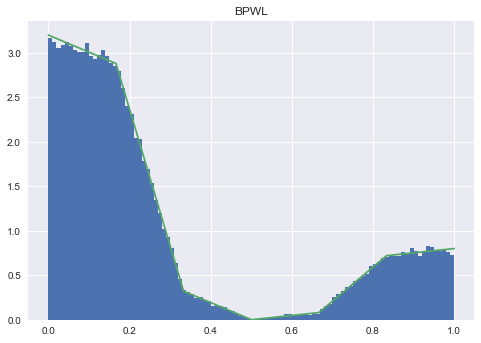

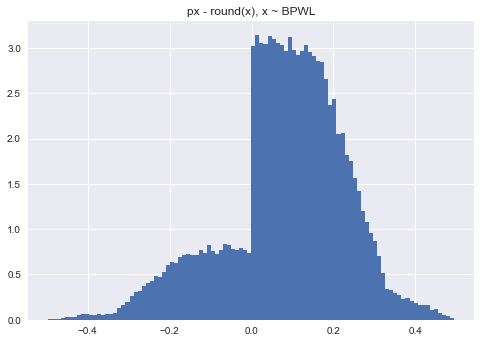

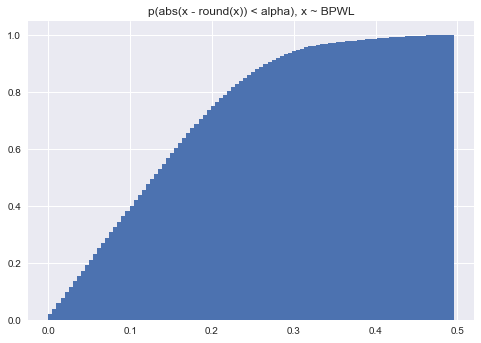

In [74]:
p = 0.2
dist = BinaryPWL(torch.Tensor([[p]]), w_c=1/6, w_t=1/6, h_d=1e-3)
x = torch.linspace(0, 1, 1000).view(1, 1, -1)
logp = dist.log_prob(x)
s = dist.sample(torch.Size([100000]))
plt.title('BPWL')
plt.hist(s.squeeze(), normed=True, bins=100)
plt.plot(x.squeeze(), torch.exp(logp).detach().squeeze())
plt.show()

plt.title('px - round(x), x ~ BPWL')
plt.hist(s.squeeze() - torch.round(s.squeeze()), bins=100, normed=True)
plt.show()
plt.title('p(abs(x - round(x)) < alpha), x ~ BPWL')
plt.hist(torch.abs(s.squeeze() - torch.round(s.squeeze())), bins=100, normed=True, cumulative=True)
plt.show()

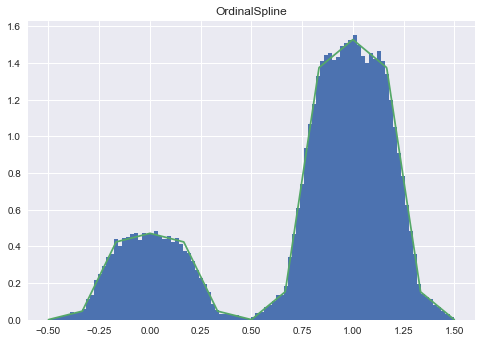

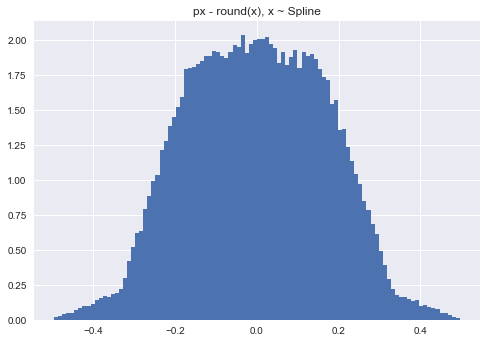

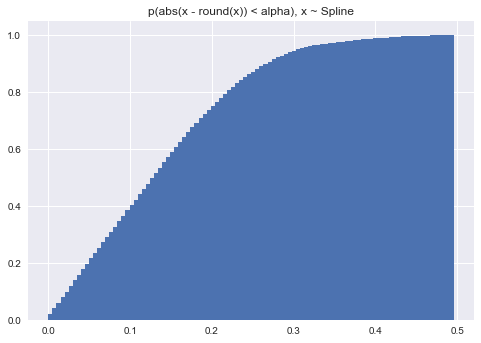

In [76]:
p = 0.2
dist = PMFPWL(torch.Tensor([[0, 1]]), torch.Tensor([[p, 1-p]]), 0, 1)
x = torch.linspace(-0.5, 1.5, 1000).view(1, 1, -1)
logp = dist.log_prob(x)
s = dist.sample(torch.Size([100000]))
plt.title("OrdinalSpline")
plt.hist(s.squeeze(), normed=True, bins=100)
plt.plot(x.squeeze(), torch.exp(logp).detach().squeeze())
plt.show()

plt.title('px - round(x), x ~ Spline')
plt.hist(s.squeeze() - torch.round(s.squeeze()), bins=100, normed=True)
plt.show()
plt.title('p(abs(x - round(x)) < alpha), x ~ Spline')
plt.hist(torch.abs(s.squeeze() - torch.round(s.squeeze())), bins=100, normed=True, cumulative=True)
plt.show()

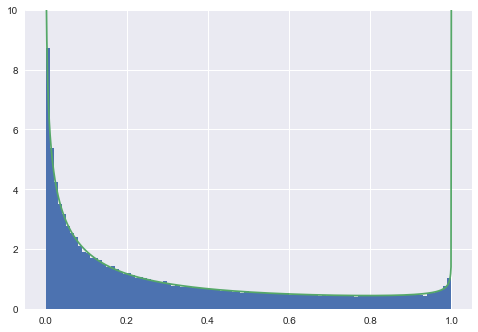

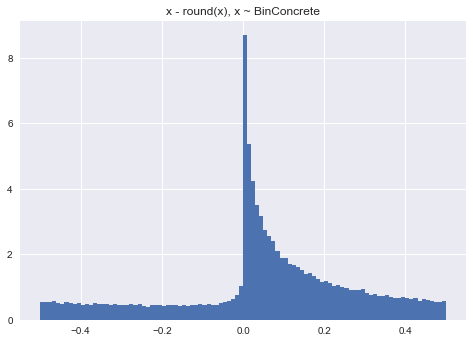

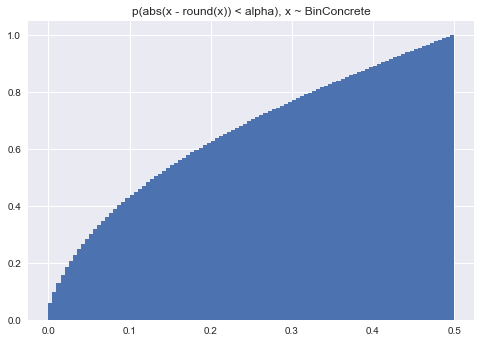

In [77]:
from torch.distributions import RelaxedBernoulli
p = 0.25
dist = RelaxedBernoulli(temperature=torch.Tensor([0.75]), probs=torch.Tensor([p]))
s = dist.sample(torch.Size([100000]))

x = torch.linspace(0, 1, 1000)
logp = dist.log_prob(x)
s = dist.sample(torch.Size([100000]))
plt.hist(s.squeeze(), normed=True, bins=100)
plt.plot(x.squeeze(), torch.exp(logp).detach().squeeze())
plt.ylim([0, 10])
plt.show()

plt.title('x - round(x), x ~ BinConcrete')
plt.hist(s.squeeze() - torch.round(s.squeeze()), bins=100, normed=True)
plt.show()
plt.title('p(abs(x - round(x)) < alpha), x ~ BinConcrete')
plt.hist(torch.abs(s.squeeze() - torch.round(s.squeeze())), bins=100, normed=True, cumulative=True)
plt.show()